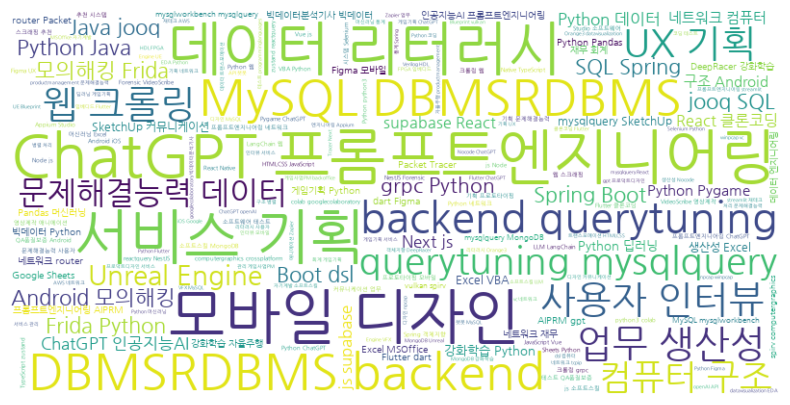

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# CSV 파일 읽기, 적절한 인코딩 사용
file_path = 'clean_inflearn_courses_info.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 텍스트를 정리하는 함수, 한글, 영어, 숫자, 공통 구두점 문자를 제외한 문자 제거
def clean_text(text):
    return re.sub(r'[^\uAC00-\uD7A3a-zA-Z0-9,.\s]', '', text)

# skills 열에 정리 함수 적용
data['cleaned_skills'] = data['skills'].dropna().apply(clean_text)

# skills 열을 추출하고 문자열로 병합, 모든 요소가 문자열 타입인지 확인
skills_text = ' '.join(data['cleaned_skills'].dropna().astype(str).tolist())

# 한글 글꼴 경로 지정, 워드 클라우드 생성
font_path = r'C:\Users\高奥成\Desktop\comment\Nanum_Gothic\NanumGothic-Regular.ttf'  # 로컬 한글 글꼴 경로로 업데이트
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(skills_text)

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
